In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats

from sklearn.model_selection._search import ParameterGrid

In [2]:
%matplotlib inline

In [3]:
import this
from whatif import Model
from whatif import get_sim_results_df

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# 1a – Base Model

In [4]:
# model class Declaration
class SingleProductSPF(Model):
    
    def __init__(self, fixed_cost = 5000, var_cost=100, selling_price=115, spf_constant=4900, spf_linear =-35,spf_quadratic =0.06):
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_constant = spf_constant
        self.spf_linear = spf_linear
        self.spf_quadratic = spf_quadratic
        
    def demand(self):
        
        return self.spf_quadratic * self.selling_price * self.selling_price + (self.spf_linear*self.selling_price) +self.spf_constant

    def revenue(self):
      
        return self.demand()* self.selling_price
    
    def total_cost(self):
        
        return self.fixed_cost + (self.demand() *self.var_cost)
    
    def profit(self):
       
        return self.revenue() - self.total_cost()
    


In [5]:
#Base Model
base_model =SingleProductSPF()

In [6]:
print(base_model.demand())

1668.5


In [7]:
print(base_model.revenue())

191877.5


In [8]:
print(base_model.total_cost())

171850.0


In [9]:
print(base_model.profit())

20027.5


# 1b – 1-way Data Table

In [10]:
# 1-way table
dt_param_ranges_1 = {'selling_price': np.arange(80, 141, 10)}

output = ['profit', 'demand']
# Use data_table function to create 1-way data table
df_1way = Model.data_table(base_model, dt_param_ranges_1, output)
df_1way

,selling_price,profit,demand
0,80,-54680.0,2484.0
1,90,-27360.0,2236.0
2,100,-5000.0,2000.0
3,110,12760.0,1776.0
4,120,26280.0,1564.0
5,130,35920.0,1364.0
6,140,42040.0,1176.0


# Relationship between selling price and profit


No handles with labels found to put in legend.


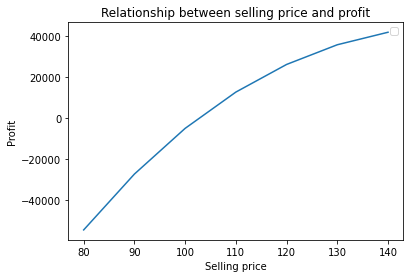

In [11]:
plt.plot(df_1way.selling_price,df_1way.profit)
plt.title('Relationship between selling price and profit')
plt.xlabel('Selling price')
plt.ylabel('Profit')
plt.legend()
plt.show();

<div class="alert alert-info">
  <b>The shape is linear which means if the value of selling price is changed, the profit must also change in the same proportion.The two variables in which the value of selling price depends on the value of the price</b>
</div>


# 1c – Break Even Selling Price value

In [12]:
Model.goal_seek(base_model, 'profit', 0, 'selling_price', 80,140)

102.57578606424767

# 1d – 2-way Data Table

In [13]:
# 2-way table
dt_param_ranges_2 = {'selling_price': np.arange(80, 141, 10),
                     'variable_cost': np.arange(85, 111, 5)}

# Specify desired outputs (list)
outputs = ['profit', 'total_cost']

# Use data_table function to create 2-way data table
df_2way = Model.data_table(base_model, dt_param_ranges_2, outputs)
df_2way

,selling_price,variable_cost,profit,total_cost
0,80,85,-54680.0,253400.0
1,80,90,-54680.0,253400.0
2,80,95,-54680.0,253400.0
3,80,100,-54680.0,253400.0
4,80,105,-54680.0,253400.0
5,80,110,-54680.0,253400.0
6,90,85,-27360.0,228600.0
7,90,90,-27360.0,228600.0
8,90,95,-27360.0,228600.0
9,90,100,-27360.0,228600.0


# Plot based on the 2-way data table 

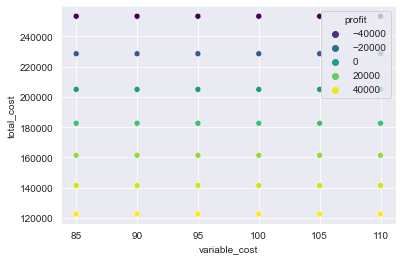

In [14]:
sns.set_style("darkgrid")
sns.scatterplot(x="variable_cost", y="total_cost", hue="profit", data=df_2way, palette="viridis");

# 1e – Digging deeper

In [15]:
#Redo the Goal Seek 
Model.goal_seek(base_model, 'profit', 0, 'selling_price', 80,250)

In [16]:
#Redo your 1-way data table 
dt_param_ranges_3 = {'selling_price': np.arange(80, 251, 10)}

output = ['profit', 'demand']
# Use data_table function to create 1-way data table
df = Model.data_table(base_model, dt_param_ranges_3, outputs)
df

,selling_price,profit,total_cost
0,80,-54680.0,253400.0
1,90,-27360.0,228600.0
2,100,-5000.0,205000.0
3,110,12760.0,182600.0
4,120,26280.0,161400.0
5,130,35920.0,141400.0
6,140,42040.0,122600.0
7,150,45000.0,105000.0
8,160,45160.0,88600.0
9,170,42880.0,73400.0


No handles with labels found to put in legend.


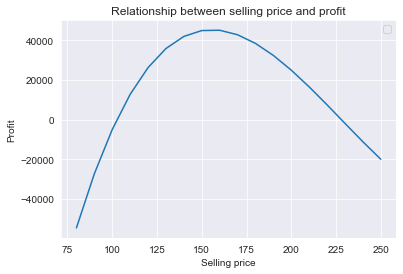

In [17]:
plt.plot(df.selling_price,df.profit)
plt.title('Relationship between selling price and profit')
plt.xlabel('Selling price')
plt.ylabel('Profit')
plt.legend()
plt.show();

<div class="alert alert-info">
  <b>why do you think that your Goal Seek failed?
      Since we have 2 break even values in the bell curve , our Model.goal_seek returns none .In bisection method,it is not clear which half of the interval to take at each step.</b>
</div>


# 1f – Simulation

Let’s add some uncertainty to the variable cost. Specifically, let’s model it with a uniform distribution between (80, 120)

In [18]:
from numpy.random import default_rng
rg = default_rng(4470)
rg.random()


0.45855804438027437

In [19]:
#Monte - Carlo Simulation using OO approach

num_reps = 100
random_inputs = {'var_cost': rg.uniform(80, 120, num_reps)}

sim_outputs = ['profit']
scenario_inputs = {'selling_price': np.arange(80, 121, 10)}
list(ParameterGrid(scenario_inputs))


model2_results = Model.simulate(base_model, random_inputs,sim_outputs, scenario_inputs)
print(model2_results)

[{'scenario_base_vals': {'fixed_cost': 5000, 'var_cost': 100, 'selling_price': 115, 'spf_constant': 4900, 'spf_linear': -35, 'spf_quadratic': 0.06}, 'scenario_num': 0, 'scenario_vals': {'selling_price': 80}, 'output': {'profit': array([ -19925.61351437,  -26051.17534984,  -39043.52695726,
        -97835.21450608,  -75731.71941757,  -76474.45648742,
        -66875.52516019,  -43104.5171831 ,  -12403.79660743,
        -10635.90278169,  -94580.17787672,   -6676.31865015,
        -37561.37728561,   -7664.75916636,  -11714.82170495,
        -25074.15120991,  -85813.88461531,  -26057.42864698,
        -91011.3028375 , -102342.87024895,  -90293.25062384,
        -24441.07054506,  -72528.40060488,  -93321.1650068 ,
        -61868.48340327,  -37859.93140512,   -7216.9284641 ,
        -59535.51022715,  -63270.96312407,  -73338.64930895,
        -12069.52784384,  -97142.58548838,  -80444.09422471,
        -85171.58538146,  -61914.82151575,  -64311.01845547,
        -93282.80321074,  -21558.917622

In [20]:
#Dataframe
model2_results_df = get_sim_results_df(model2_results)

In [21]:
model2_results_df

,profit,scenario_num,selling_price
0,-19925.613514,0,80
1,-26051.175350,0,80
2,-39043.526957,0,80
3,-97835.214506,0,80
4,-75731.719418,0,80
...,...,...,...
95,55574.494318,4,120
96,35970.640472,4,120
97,3286.771189,4,120
98,45189.015740,4,120


In [22]:
# Summary stats
model2_results_df.groupby(['scenario_num'])['profit'].describe()

,count,mean,std,min,25%,50%,75%,max
scenario_num,,,,,,,,
0,100.0,-53974.075507,30126.659842,-102342.870249,-78820.858793,-58397.496737,-26055.865323,-5037.649314
1,100.0,-26724.554281,27118.845172,-70264.258404,-49090.660330,-30706.345694,-1593.669429,17326.109555
2,100.0,-4431.622791,24256.569921,-43375.901972,-24437.084374,-7993.153572,18046.807309,34969.686543
3,100.0,13264.718961,21539.834090,-21317.800951,-4500.130924,10102.079628,33225.564890,48253.081650
4,100.0,26724.470977,18968.637678,-3729.955342,11080.200019,23939.353907,44302.603315,57536.294876


1) Create a histogram of profit



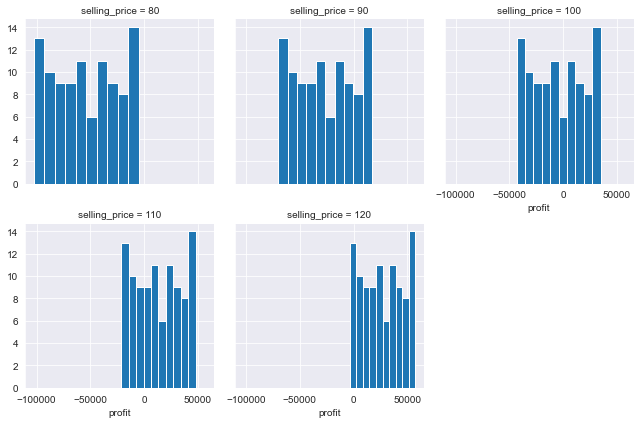

In [23]:
profit_histo = sns.FacetGrid(model2_results_df, col='selling_price', sharey=True, col_wrap=3)
profit_histo = profit_histo.map(plt.hist, "profit")

2)What is the probability that profit is negative based on our simulation? 



In [24]:
# Probability profit is negative
print((stats.percentileofscore(model2_results_df.profit, 0) - stats.percentileofscore(model2_results_df.profit, -100000)) / 100.0)

0.54
